In [28]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn import preprocessing
#from sklearn.datasets import make_classification        
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import minmax_scale
import seaborn as sn
import itertools
from scipy import stats

from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



In [29]:
data=pd.read_csv('D_Train1.csv', sep = ',')

In [30]:
data.head()

,Location,WS1,WS2,WS3,WS4,WS5,WS6,WS7
0,1,-62,-55,-65,-59,-69,-86,-87
1,1,-61,-56,-65,-65,-66,-77,-81
2,1,-62,-58,-57,-65,-70,-82,-91
3,1,-59,-57,-60,-60,-63,-81,-77
4,1,-69,-58,-56,-61,-73,-81,-93


In [31]:
data.describe()

,Location,WS1,WS2,WS3,WS4,WS5,WS6,WS7
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,2.500000,-52.325000,-55.589375,-54.960000,-53.494375,-62.671250,-80.994375,-81.691250
std,1.118384,11.351317,3.420793,5.279993,11.519729,9.073223,6.508038,6.525434
min,1.000000,-74.000000,-74.000000,-73.000000,-77.000000,-86.000000,-97.000000,-98.000000
25%,1.750000,-61.000000,-58.000000,-58.000000,-63.000000,-69.000000,-86.000000,-86.000000
50%,2.500000,-55.000000,-56.000000,-55.000000,-56.000000,-64.000000,-82.000000,-83.000000
75%,3.250000,-46.000000,-53.000000,-51.000000,-46.000000,-56.000000,-77.000000,-78.000000
max,4.000000,-10.000000,-45.000000,-42.000000,-13.000000,-39.000000,-62.000000,-64.000000


In [32]:
data[data.isnull().any(axis=1)] #check if we have null data


#data=data.dropna() to drop null data if any

,Location,WS1,WS2,WS3,WS4,WS5,WS6,WS7


In [33]:
data.isna().sum()

Location    0
WS1         0
WS2         0
WS3         0
WS4         0
WS5         0
WS6         0
WS7         0
dtype: int64

In [34]:
data.dtypes

Location    int64
WS1         int64
WS2         int64
WS3         int64
WS4         int64
WS5         int64
WS6         int64
WS7         int64
dtype: object

In [35]:
data.describe()

,Location,WS1,WS2,WS3,WS4,WS5,WS6,WS7
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,2.500000,-52.325000,-55.589375,-54.960000,-53.494375,-62.671250,-80.994375,-81.691250
std,1.118384,11.351317,3.420793,5.279993,11.519729,9.073223,6.508038,6.525434
min,1.000000,-74.000000,-74.000000,-73.000000,-77.000000,-86.000000,-97.000000,-98.000000
25%,1.750000,-61.000000,-58.000000,-58.000000,-63.000000,-69.000000,-86.000000,-86.000000
50%,2.500000,-55.000000,-56.000000,-55.000000,-56.000000,-64.000000,-82.000000,-83.000000
75%,3.250000,-46.000000,-53.000000,-51.000000,-46.000000,-56.000000,-77.000000,-78.000000
max,4.000000,-10.000000,-45.000000,-42.000000,-13.000000,-39.000000,-62.000000,-64.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2072ac90>,
      dtype=object)

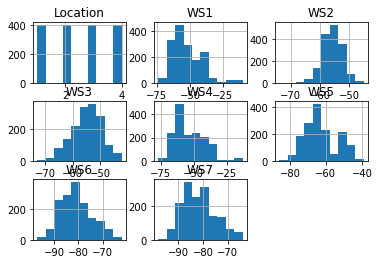

In [36]:
data.hist()

In [37]:
train_label = data['Location']
train_data = data.drop('Location', axis=1)

In [38]:
train_label.shape, train_data.shape

((1600,), (1600, 7))

In [39]:
train_data.describe()

,WS1,WS2,WS3,WS4,WS5,WS6,WS7
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,-52.325000,-55.589375,-54.960000,-53.494375,-62.671250,-80.994375,-81.691250
std,11.351317,3.420793,5.279993,11.519729,9.073223,6.508038,6.525434
min,-74.000000,-74.000000,-73.000000,-77.000000,-86.000000,-97.000000,-98.000000
25%,-61.000000,-58.000000,-58.000000,-63.000000,-69.000000,-86.000000,-86.000000
50%,-55.000000,-56.000000,-55.000000,-56.000000,-64.000000,-82.000000,-83.000000
75%,-46.000000,-53.000000,-51.000000,-46.000000,-56.000000,-77.000000,-78.000000
max,-10.000000,-45.000000,-42.000000,-13.000000,-39.000000,-62.000000,-64.000000


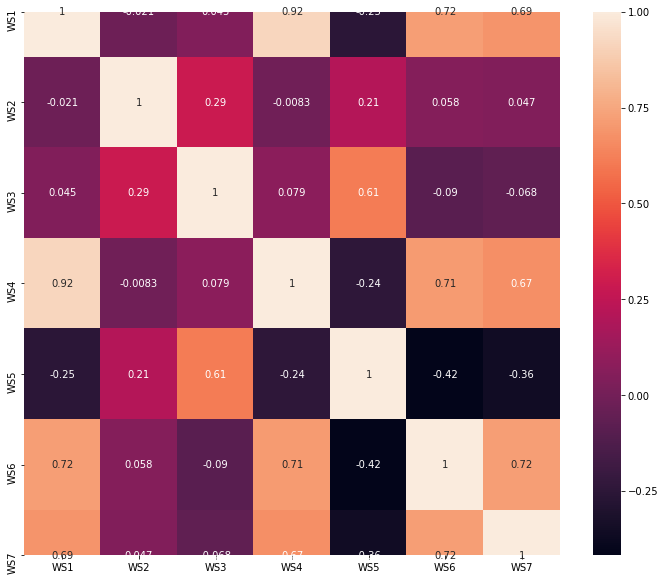

In [40]:
fig, ax = plt.subplots(figsize=(12, 10))
sn.heatmap(train_data.corr(), annot=True)

In [41]:
train_data, test_data, train_label, test_label = train_test_split(train_data, train_label, test_size = 0.2, random_state=0) 
train_data.shape, test_data.shape




((1280, 7), (320, 7))

In [45]:
scaler=preprocessing.StandardScaler()
train_data_standard = scaler.fit_transform(train_data) 
test_data_standard = scaler.transform(test_data)

In [46]:
#train_data_db=data.drop('Location', axis=1)
train_data_df=pd.DataFrame(train_data, columns=train_data.columns)

In [47]:
train_data_standard_df=pd.DataFrame(train_data_standard, columns=train_data_df.columns)

In [48]:
train_data_standard_df.describe()

,WS1,WS2,WS3,WS4,WS5,WS6,WS7
count,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03
mean,2.704434e-16,8.716552e-16,5.497230e-16,-2.081668e-18,-2.643719e-16,9.291179e-16,5.898060e-18
std,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00
min,-1.904595e+00,-5.344337e+00,-3.404176e+00,-2.034273e+00,-2.610299e+00,-2.445922e+00,-2.490599e+00
25%,-7.614534e-01,-6.935329e-01,-5.764448e-01,-8.219627e-01,-7.160783e-01,-7.621309e-01,-6.584341e-01
50%,-2.338495e-01,-1.121825e-01,-1.089855e-02,-2.158075e-01,-1.589544e-01,-1.498431e-01,-2.003930e-01
75%,5.575565e-01,7.598432e-01,7.431631e-01,6.501285e-01,6.210190e-01,6.155167e-01,5.630089e-01
max,3.723180e+00,3.085245e+00,2.439802e+00,3.507717e+00,2.626665e+00,2.911596e+00,2.700534e+00


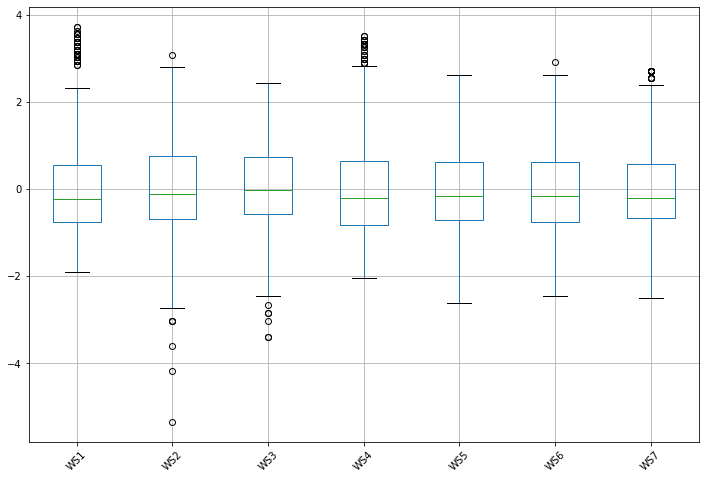

In [49]:
train_data_standard_df.boxplot(figsize=(12, 8), rot=45)

plt.show()

In [50]:
z=np.abs(stats.zscore(train_data_standard))

In [51]:
print(z)

[[3.10764235 2.14690911 1.89605268 ... 2.61029946 1.38087644 1.17373038]
 [1.20112342 0.17849276 0.95347561 ... 0.38180396 0.60905895 0.81111449]
 [3.54731232 2.43758434 1.51902185 ... 0.71607828 1.38087644 1.17373038]
 ...
 [0.67351944 1.63186893 0.74316311 ... 1.51241722 0.91520286 0.35307337]
 [1.08516046 0.40285771 1.49722476 ... 0.15895441 1.07473253 1.63177151]
 [1.34896244 0.17849276 0.01089855 ... 0.71607828 2.29930816 1.93713226]]


In [52]:
thrs=3
print(np.where(z>3))

(array([   0,    2,    2,   42,   42,   42,   59,   59,  108,  180,  207,
        207,  215,  362,  363,  372,  432,  454,  454,  491,  491,  529,
        561,  625,  625,  638,  662,  662,  680,  680,  705,  705,  782,
        807,  812,  812,  883,  883,  950,  953,  953,  958,  958,  981,
        981,  983,  985,  999, 1044, 1070, 1117, 1152, 1186, 1186, 1186,
       1199, 1208, 1208, 1242, 1242, 1253, 1271]), array([0, 0, 3, 0, 1, 3, 0, 3, 0, 3, 0, 3, 0, 2, 1, 0, 0, 0, 3, 0, 3, 1,
       2, 0, 3, 1, 0, 3, 0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 3, 0,
       3, 2, 3, 0, 0, 1, 0, 3, 0, 1, 3, 1, 0, 3, 0, 3, 0, 0]))


In [53]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Location     1.5
WS1         15.0
WS2          5.0
WS3          7.0
WS4         17.0
WS5         13.0
WS6          9.0
WS7          8.0
dtype: float64


print(data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))

In [54]:
print(data['WS1'].quantile(0.10))
print(data['WS1'].quantile(0.90))

-64.0
-38.0


In [55]:
data['WS1'] = np.where(data['WS1'] <-64.0, -64.0,data['WS1'])
data['WS1'] = np.where(data['WS1'] >-38.0, -38.0,data['WS1'])
print(data['WS1'].skew())

0.399051057209738


In [56]:
#df["WS1"] = np.where(df["WS1"] <-64.0, -64.0,df['WS1'])
#df["WS1"] = np.where(df["WS1"] >-38.0, -38.0,df['WS1'])
print('skew1:',data['WS1'].skew())
print('skew2:',data['WS2'].skew())
print('skew3:',data['WS3'].skew())
print('skew4:',data['WS4'].skew())
print('skew5:',data['WS5'].skew())
print('skew6:',data['WS6'].skew())
print('skew7:',data['WS7'].skew())

skew1: 0.399051057209738
skew2: -0.26360706418301216
skew3: -0.2588857304866265
skew4: 0.846194491503386
skew5: 0.3942235277409816
skew6: 0.43629642032775834
skew7: 0.48893599953670425


In [57]:
train_data.var(axis=0)

WS1    129.427277
WS2     11.844681
WS3     28.160846
WS4    133.465146
WS5     80.607582
WS6     42.711830
WS7     42.931196
dtype: float64

In [58]:
#train_scaled=pd.DataFrame(minmax_scale(train_data, feature_range=(0,10)), columns=train_data.columns)

In [60]:
clf_GNB=GaussianNB(priors=None)
GNB_pred = clf_GNB.fit(train_data_standard, train_label).predict(test_data_standard)
print("Number of mislabeled points out of a total %d points : %d" % (test_data_standard.shape[0], (test_label != GNB_pred).sum()))

Number of mislabeled points out of a total 400 points : 9


In [61]:
print('***** Training Accuracy with GNB:', accuracy_score(train_label,clf_GNB.predict(train_data_standard)))
print('***** Test Accuracy with GNB:', accuracy_score(test_label,clf_GNB.predict(test_data_standard)))

***** Training Accuracy with GNB: 0.98515625
***** Test Accuracy with GNB: 0.9775


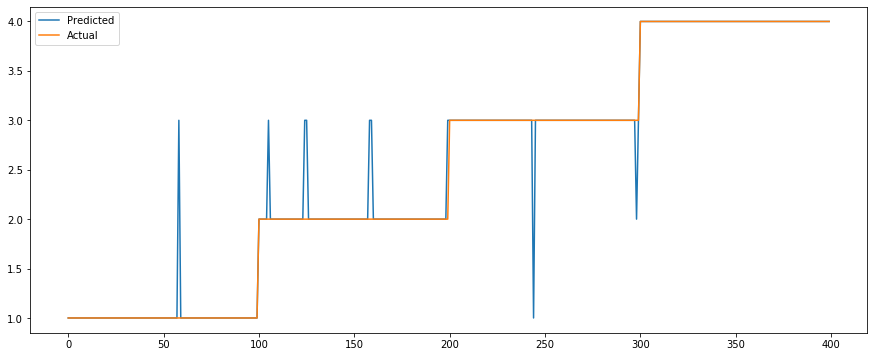

In [62]:
#plot
plt.rcParams['figure.figsize'] = [15,6]
plt.plot(GNB_pred, label='Predicted')
plt.plot(test_label, label='Actual')
plt.legend()
plt.show()

confusion matrix without normalization
[[ 99   0   1   0]
 [  0  94   6   0]
 [  1   1  98   0]
 [  0   0   0 100]]


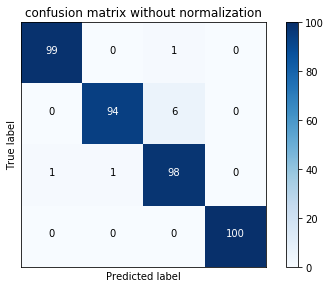

In [63]:
test_pred=clf_GNB.predict(test_data_standard)
#print(confusion_matrix(test_label, pred))
plt.rcParams['figure.figsize'] = [6,4]


classes=range(1-4)


cmap=plt.cm.Blues
cm=confusion_matrix(np.array(test_label),np.array(test_pred))

plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
title= 'confusion matrix without normalization'

plt.title(title)

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation = 45)
plt.yticks(tick_marks, classes)

print ('confusion matrix without normalization')
print (cm)

thresh = cm.max() / 2
fmt = 'd'
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


confusion matrix with normalization
[[0.99 0.   0.01 0.  ]
 [0.   0.94 0.06 0.  ]
 [0.01 0.01 0.98 0.  ]
 [0.   0.   0.   1.  ]]


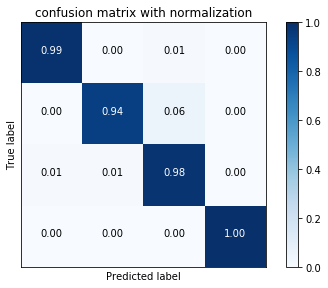

In [64]:
#normalized
plt.rcParams['figure.figsize'] = [6,4]

#plt.figure(figsize=(10, 6))
test_pred=clf_GNB.predict(test_data_standard)
cmap=plt.cm.Blues
classes = range(1-4)
cm=confusion_matrix(np.array(test_label),np.array(test_pred))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]



plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
title= 'confusion matrix with normalization'
plt.title(title)

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation = 90)
plt.yticks(tick_marks, classes)


print ('confusion matrix with normalization')
print (cm)

np.set_printoptions(precision=2)



thresh = cm.max() / 1.5
fmt = '.2f' 
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [65]:
clf_RF=RandomForestClassifier(n_estimators=500,max_depth=20).fit(train_data_standard, train_label) 
RF_pred = clf_RF.fit(train_data_standard, train_label).predict(test_data_standard)

print("Number of mislabeled points out of a total %d points : %d" % (test_data_standard.shape[0], (test_label != RF_pred).sum()))
print('***** Training Accuracy with RF:', accuracy_score(train_label,clf_RF.predict(train_data_standard)))
print('***** Test Accuracy with RF:', accuracy_score(test_label,clf_RF.predict(test_data_standard)))


Number of mislabeled points out of a total 400 points : 8
***** Training Accuracy with RF: 1.0
***** Test Accuracy with RF: 0.98


In [66]:
print(classification_report(test_label, RF_pred))

              precision    recall  f1-score   support

           1       1.00      0.99      0.99       100
           2       0.97      0.96      0.96       100
           3       0.95      0.97      0.96       100
           4       1.00      1.00      1.00       100

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



confusion matrix without normalization
[[ 99   0   1   0]
 [  0  96   4   0]
 [  0   3  97   0]
 [  0   0   0 100]]


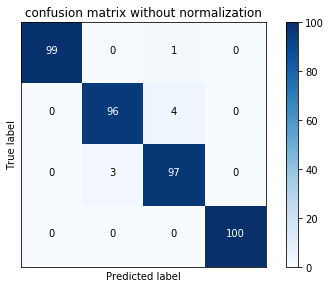

In [67]:
test_pred=clf_RF.predict(test_data_standard)
#print(confusion_matrix(test_label, pred))
plt.rcParams['figure.figsize'] = [6,4]


#classes=['Location1', 'Location2', 'Location3', 'Location4' ]
classes=range(0-3)


cmap=plt.cm.Blues
cm=confusion_matrix(np.array(test_label),np.array(test_pred))

plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
title= 'confusion matrix without normalization'

plt.title(title)

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation = 45)
plt.yticks(tick_marks, classes)

print ('confusion matrix without normalization')
print (cm)

thresh = cm.max() / 2
fmt = 'd'
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



confusion matrix with normalization
[[0.99 0.   0.01 0.  ]
 [0.   0.96 0.04 0.  ]
 [0.   0.03 0.97 0.  ]
 [0.   0.   0.   1.  ]]


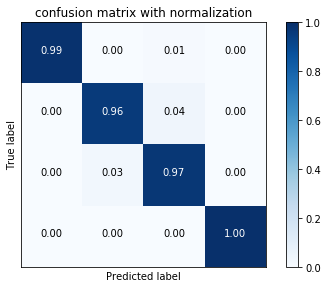

In [68]:
#normalized
plt.rcParams['figure.figsize'] = [6,4]

#plt.figure(figsize=(10, 6))
test_pred=clf_RF.predict(test_data_standard)
cmap=plt.cm.Blues
#classes=['WS1', 'WS2', 'WS3', 'WS4', 'WS5', 'WS6', 'WS7' ]
classes = range(0-6)
cm=confusion_matrix(np.array(test_label),np.array(test_pred))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]



plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
title= 'confusion matrix with normalization'
plt.title(title)

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation = 90)
plt.yticks(tick_marks, classes)


print ('confusion matrix with normalization')
print (cm)

np.set_printoptions(precision=2)



thresh = cm.max() / 1.5
fmt = '.2f' 
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [69]:
clf_svm=SVC().fit(train_data_standard, train_label) 
svm_pred = clf_svm.fit(train_data_standard, train_label).predict(test_data_standard)

print("Number of mislabeled points out of a total %d points : %d" % (test_data_standard.shape[0], (test_label != svm_pred).sum()))

print('***** Training Accuracy with SVM:', accuracy_score(train_label,clf_svm.predict(train_data_standard)))
print('***** Test Accuracy with SVM:', accuracy_score(test_label,clf_svm.predict(test_data_standard)))


Number of mislabeled points out of a total 400 points : 11
***** Training Accuracy with SVM: 0.9875
***** Test Accuracy with SVM: 0.9725


In [70]:
print(classification_report(test_label, svm_pred))

              precision    recall  f1-score   support

           1       1.00      0.99      0.99       100
           2       0.96      0.95      0.95       100
           3       0.94      0.95      0.95       100
           4       0.99      1.00      1.00       100

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



confusion matrix without normalization
[[ 99   0   1   0]
 [  0  95   5   0]
 [  0   4  95   1]
 [  0   0   0 100]]


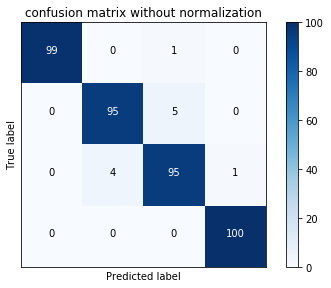

In [71]:
test_pred=clf_svm.predict(test_data_standard)
#print(confusion_matrix(test_label, pred))
plt.rcParams['figure.figsize'] = [6,4]


classes=range(1-4)


cmap=plt.cm.Blues
cm=confusion_matrix(np.array(test_label),np.array(test_pred))

plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
title= 'confusion matrix without normalization'

plt.title(title)

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation = 45)
plt.yticks(tick_marks, classes)

print ('confusion matrix without normalization')
print (cm)

thresh = cm.max() / 2
fmt = 'd'
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()




confusion matrix with normalization
[[0.99 0.   0.01 0.  ]
 [0.   0.95 0.05 0.  ]
 [0.   0.04 0.95 0.01]
 [0.   0.   0.   1.  ]]


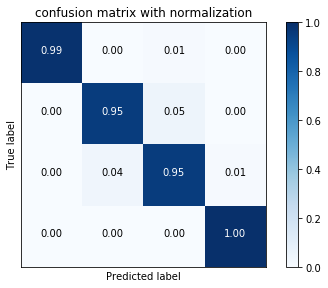

In [72]:
#normalized
plt.rcParams['figure.figsize'] = [6,4]

#plt.figure(figsize=(10, 6))
test_pred=clf_svm.predict(test_data_standard)
cmap=plt.cm.Blues
classes=range(1-4)


cm=confusion_matrix(np.array(test_label),np.array(test_pred))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]



plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
title= 'confusion matrix with normalization'
plt.title(title)

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation = 90)
plt.yticks(tick_marks, classes)


print ('confusion matrix with normalization')
print (cm)

np.set_printoptions(precision=2)



thresh = cm.max() / 1.5
fmt = '.2f' 
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



In [73]:
clf_svm_C=SVC(C=10).fit(train_data_standard, train_label) 
svm_C_pred = clf_svm_C.fit(train_data_standard, train_label).predict(test_data_standard)

print("Number of mislabeled points out of a total %d points : %d" % (test_data_standard.shape[0], (test_label != svm_C_pred).sum()))
print('***** Training Accuracy with SVM:', accuracy_score(train_label,clf_svm_C.predict(train_data_standard)))
print('***** Test Accuracy with SVM:', accuracy_score(test_label,clf_svm_C.predict(test_data_standard)))

Number of mislabeled points out of a total 400 points : 11
***** Training Accuracy with SVM: 0.9921875
***** Test Accuracy with SVM: 0.9725


In [74]:
print(classification_report(test_label, svm_C_pred))

              precision    recall  f1-score   support

           1       1.00      0.99      0.99       100
           2       0.96      0.95      0.95       100
           3       0.94      0.95      0.95       100
           4       0.99      1.00      1.00       100

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



confusion matrix without normalization
[[ 99   0   1   0]
 [  0  95   5   0]
 [  0   4  95   1]
 [  0   0   0 100]]


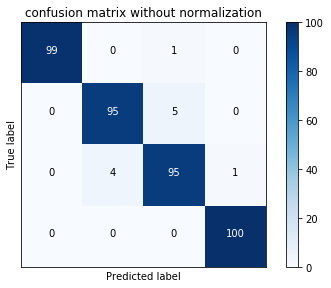

In [75]:
test_pred=clf_svm_C.predict(test_data_standard)
#print(confusion_matrix(test_label, pred))
plt.rcParams['figure.figsize'] = [6,4]


classes=range(1-4)




cmap=plt.cm.Blues
cm=confusion_matrix(np.array(test_label),np.array(test_pred))

plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
title= 'confusion matrix without normalization'

plt.title(title)

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation = 45)
plt.yticks(tick_marks, classes)

print ('confusion matrix without normalization')
print (cm)

thresh = cm.max() / 2
fmt = 'd'
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


confusion matrix with normalization
[[0.99 0.   0.01 0.  ]
 [0.   0.95 0.05 0.  ]
 [0.   0.04 0.95 0.01]
 [0.   0.   0.   1.  ]]


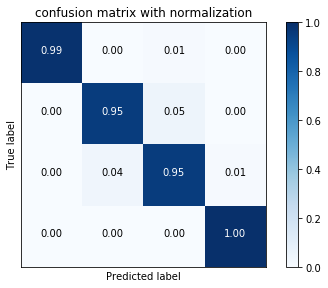

In [76]:
#normalized
plt.rcParams['figure.figsize'] = [6,4]

#plt.figure(figsize=(10, 6))
test_pred=clf_svm_C.predict(test_data_standard)
cmap=plt.cm.Blues
classes=range(1-4)


cm=confusion_matrix(np.array(test_label),np.array(test_pred))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]



plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
title= 'confusion matrix with normalization'
plt.title(title)

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation = 90)
plt.yticks(tick_marks, classes)


print ('confusion matrix with normalization')
print (cm)

np.set_printoptions(precision=2)



thresh = cm.max() / 1.5
fmt = '.2f' 
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



In [77]:
from sklearn.linear_model import LinearRegression, Lasso

linear_model=LinearRegression()
linear_model.fit(train_data_standard, train_label)
linear_pred = linear_model.predict(test_data_standard)

In [78]:
r_square_train =linear_model.score(train_data_standard, train_label) #R^2
print ('r_square_train:',r_square_train )

r_square_train: 0.7793042167196391


In [79]:
r_square_test =linear_model.score(test_data_standard, test_label) #R^2
print ('r_square_test:',r_square_test )

r_square_test: 0.7833176703844644


In [80]:
from sklearn.metrics import mean_squared_error

linear_model_mse = mean_squared_error(linear_pred, test_label)
print ('linear_model_mse', linear_model_mse)

linear_model_mse 0.2708529120194195


In [81]:
#using Lasso Regression ro reduce problem of overfitting
#penalizes large resgression coefficients

In [82]:
lasso_model = Lasso(alpha = 0.5)
lasso_model.fit(train_data_standard, train_label)


Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [83]:
lasso_model.score(train_data_standard, train_label)

0.47370189912895505

In [84]:
lasso_r_squre = lasso_model.score(test_data_standard, test_label)
lasso_r_squre


0.4932692836603656

In [85]:
lasso_pred = lasso_model.predict(test_data_standard)
lasso_model_mse = mean_squared_error(lasso_pred, test_label)
lasso_model_mse

0.633413395424543

In [86]:
#Gradient boosting regression

In [87]:
from sklearn.ensemble import GradientBoostingRegressor

params = {'n_estimators':500, 'max_depth': 6, 'min_samples_split': 2, 'learning_rate': 0.01, 'loss': 'ls'}
gbr_model= GradientBoostingRegressor(**params)
gbr_model.fit(train_data_standard, train_label)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [88]:
gbr_model.score(train_data_standard, train_label)

0.9989368112743897

In [89]:
gbr_predict = gbr_model.predict(test_data_standard)
gbr_r_square = gbr_model.score(test_data_standard, test_label)
gbr_r_square 

0.949787780238661

In [90]:
from sklearn.model_selection import GridSearchCV

num_estimators = [100, 200, 500]
learn_rates=[0.01, 0.02, 0.05, 0.1]
max_depths = [4, 6, 8]

param_grid = {'n_estimators': num_estimators,
             'learning_rate': learn_rates,
             'max_depth': max_depths}

grid_search = GridSearchCV(GradientBoostingRegressor(min_samples_split = 2, loss = 'ls'),
                          param_grid, cv=3, return_train_score=True)

grid_search.fit(train_data_standard, train_label)
grid_search.best_params_

{'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 500}

In [91]:
params = {'n_estimators':100, 'max_depth': 4, 'min_samples_split': 2, 'learning_rate': 0.1, 'loss': 'ls'}
gbr_model= GradientBoostingRegressor(**params)
gbr_model.fit(train_data_standard, train_label)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [92]:
gbr_model.score(train_data_standard, train_label)

0.9961369821325794

In [93]:
gbr_predict = gbr_model.predict(test_data_standard)
gbr_r_square = gbr_model.score(test_data_standard, test_label)
gbr_r_square 

0.9600914772939046

In [94]:
gbr_model_mse = mean_squared_error(gbr_predict, test_label)
gbr_model_mse

0.0498856533826192

In [95]:
#Linear Discriminant finds axes to best separate the classes such that all instances of a cllass are in the same quadrant

In [96]:
LDA_model=LinearDiscriminantAnalysis(solver='svd')
LDA_model.fit(train_data_standard, train_label)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [97]:
LDA_pred = LDA_model.fit(train_data_standard, train_label).predict(test_data_standard)

print("Number of mislabeled points out of a total %d points : %d" % (test_data_standard.shape[0], (test_label != LDA_pred).sum()))

print('***** Training Accuracy with LDA:', accuracy_score(train_label,LDA_model.predict(train_data_standard)))
print('***** Test Accuracy with LDA:', accuracy_score(test_label,LDA_model.predict(test_data_standard)))

Number of mislabeled points out of a total 400 points : 14
***** Training Accuracy with LDA: 0.97265625
***** Test Accuracy with LDA: 0.965


In [98]:
#QDA, finds axes to best separate the classes tha all instances of a class are in the same quadrant but the decision boundary is quadratic

In [99]:
QDA_model=QuadraticDiscriminantAnalysis()
QDA_model.fit(train_data_standard, train_label)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [100]:
QDA_pred= QDA_model.fit(train_data_standard, train_label).predict(test_data_standard)

print("Number of mislabeled points out of a total %d points : %d" % (test_data_standard.shape[0], (test_label != QDA_pred).sum()))

print('***** Training Accuracy with QDA:', accuracy_score(train_label,QDA_model.predict(train_data_standard)))
print('***** Test Accuracy with QDA:', accuracy_score(test_label,QDA_model.predict(test_data_standard)))

Number of mislabeled points out of a total 400 points : 7
***** Training Accuracy with QDA: 0.98125
***** Test Accuracy with QDA: 0.9825


In [101]:
SGD_model=SGDClassifier(max_iter=10000, tol=1e-3)
SGD_model.fit(train_data_standard, train_label)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=10000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [102]:
SGD_pred= SGD_model.fit(train_data_standard, train_label).predict(test_data_standard)

print("Number of mislabeled points out of a total %d points : %d" % (test_data_standard.shape[0], (test_label != SGD_pred).sum()))

print('***** Training Accuracy with SGD:', accuracy_score(train_label,SGD_model.predict(train_data_standard)))
print('***** Test Accuracy with SGD:', accuracy_score(test_label,SGD_model.predict(test_data_standard)))

Number of mislabeled points out of a total 400 points : 16
***** Training Accuracy with SGD: 0.97734375
***** Test Accuracy with SGD: 0.96


In [103]:
linearSVM_model=LinearSVC(C=100,max_iter=10000, tol=1e-3, dual=False)
linearSVM_model.fit(train_data_standard, train_label)

LinearSVC(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.001,
          verbose=0)

In [104]:
linearSVM_pred= linearSVM_model.fit(train_data_standard, train_label).predict(test_data_standard)

print("Number of mislabeled points out of a total %d points : %d" % (test_data_standard.shape[0], (test_label != linearSVM_pred).sum()))

print('***** Training Accuracy with linearSVM:', accuracy_score(train_label,linearSVM_model.predict(train_data_standard)))
print('***** Test Accuracy with linearSVM:', accuracy_score(test_label,linearSVM_model.predict(test_data_standard)))

Number of mislabeled points out of a total 400 points : 11
***** Training Accuracy with linearSVM: 0.9765625
***** Test Accuracy with linearSVM: 0.9725


In [105]:
KNN_model=KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(train_data_standard, train_label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [106]:
KNN_pred= KNN_model.fit(train_data_standard, train_label).predict(test_data_standard)

print("Number of mislabeled points out of a total %d points : %d" % (test_data_standard.shape[0], (test_label != KNN_pred).sum()))

print('***** Training Accuracy with KNN:', accuracy_score(train_label,KNN_model.predict(train_data_standard)))
print('***** Test Accuracy with KNN:', accuracy_score(test_label,KNN_model.predict(test_data_standard)))

Number of mislabeled points out of a total 400 points : 5
***** Training Accuracy with KNN: 0.990625
***** Test Accuracy with KNN: 0.9875


In [107]:
DT_model=DecisionTreeClassifier(max_depth=None, max_features=None)
DT_model.fit(train_data_standard, train_label)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [108]:
DT_pred= DT_model.fit(train_data_standard, train_label).predict(test_data_standard)

print("Number of mislabeled points out of a total %d points : %d" % (test_data_standard.shape[0], (test_label != DT_pred).sum()))

print('***** Training Accuracy with DT:', accuracy_score(train_label,DT_model.predict(train_data_standard)))
print('***** Test Accuracy with DT:', accuracy_score(test_label,DT_model.predict(test_data_standard)))

Number of mislabeled points out of a total 400 points : 16
***** Training Accuracy with DT: 1.0
***** Test Accuracy with DT: 0.96


In [109]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca.fit_transform(train_data_standard)

array([[ 4.82,  2.46],
       [-1.7 ,  1.33],
       [ 4.85,  1.07],
       ...,
       [-1.84, -1.68],
       [ 2.19, -1.29],
       [ 3.32, -0.35]])

In [110]:
pca.explained_variance_ratio_ #gives magnitude of variation for each component in %

array([0.49, 0.24])

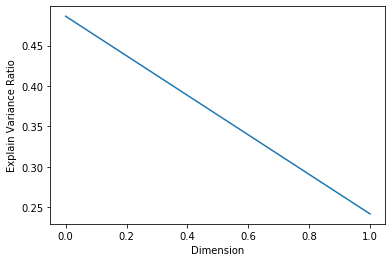

In [111]:
import matplotlib.pyplot as plt
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Dimension')
plt.ylabel('Explain Variance Ratio')
plt.show()

In [112]:
X_train=pca.fit_transform(train_data_standard)
Y_train=train_label
x_test=pca.transform(test_data_standard)
y_test=test_label



In [113]:
clf_RF_pca = RandomForestClassifier(n_estimators=500, max_depth=20).fit(X_train, Y_train) 

accuracy = clf_RF_pca.score(x_test, y_test)
print(accuracy)

0.9


In [114]:
RF_pred_pca = clf_RF_pca.fit(X_train, Y_train).predict(x_test)

print("Number of mislabeled points out of a total %d points : %d" % (x_test.shape[0], (y_test != RF_pred_pca).sum()))
print('***** Training Accuracy with RF:', accuracy_score(Y_train,clf_RF_pca.predict(X_train)))
print('***** Test Accuracy with RF:', accuracy_score(y_test,clf_RF_pca.predict(x_test)))



Number of mislabeled points out of a total 400 points : 41
***** Training Accuracy with RF: 1.0
***** Test Accuracy with RF: 0.8975


In [129]:
n_estimators = [50, 100, 500, 700, 1000]
max_depth=[None, 5, 10, 20, 30, 40, 50]

param_grid = {'n_estimators': n_estimators,
             'max_depth': max_depth}
             

RF_search = GridSearchCV(RandomForestClassifier(),param_grid, cv=3, return_train_score=True) #3 fold, and checkes with accurracy rate

RF_search.fit(X_train, Y_train)
RF_search.best_params_

{'max_depth': 5, 'n_estimators': 100}

In [116]:
clf_RF_pca = RandomForestClassifier(n_estimators=100, max_depth=5).fit(X_train, Y_train) 
RF_pred_pca = clf_RF_pca.fit(X_train, Y_train).predict(x_test)

print("Number of mislabeled points out of a total %d points : %d" % (x_test.shape[0], (y_test != RF_pred_pca).sum()))
print('***** Training Accuracy with RF:', accuracy_score(Y_train,clf_RF_pca.predict(X_train)))
print('***** Test Accuracy with RF:', accuracy_score(y_test,clf_RF_pca.predict(x_test)))



Number of mislabeled points out of a total 400 points : 36
***** Training Accuracy with RF: 0.94453125
***** Test Accuracy with RF: 0.91


In [117]:
print(classification_report(y_test, RF_pred_pca))

              precision    recall  f1-score   support

           1       0.89      0.89      0.89       100
           2       0.95      0.93      0.94       100
           3       0.84      0.83      0.83       100
           4       0.96      0.99      0.98       100

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



confusion matrix without normalization
[[89  0  9  2]
 [ 0 93  7  0]
 [ 9  5 84  2]
 [ 1  0  0 99]]


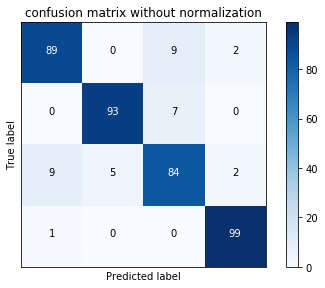

In [118]:
test_pred=clf_RF_pca.fit(X_train, Y_train).predict(x_test)
#print(confusion_matrix(test_label, pred))
plt.rcParams['figure.figsize'] = [6,4]


classes=range(1-4)


cmap=plt.cm.Blues
cm=confusion_matrix(np.array(test_label),np.array(test_pred))

plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
title= 'confusion matrix without normalization'

plt.title(title)

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation = 45)
plt.yticks(tick_marks, classes)

print ('confusion matrix without normalization')
print (cm)

thresh = cm.max() / 2
fmt = 'd'
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



confusion matrix with normalization
[[0.89 0.   0.09 0.02]
 [0.   0.92 0.08 0.  ]
 [0.11 0.05 0.82 0.02]
 [0.01 0.   0.   0.99]]


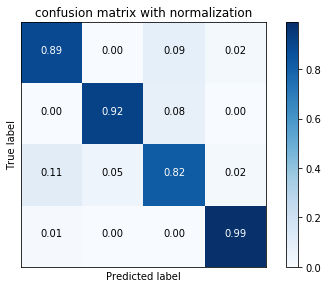

In [119]:
#normalized
plt.rcParams['figure.figsize'] = [6,4]

#plt.figure(figsize=(10, 6))
test_pred=clf_RF_pca.fit(X_train, Y_train).predict(x_test)
cmap=plt.cm.Blues
classes = range(1-4)
cm=confusion_matrix(np.array(test_label),np.array(test_pred))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]



plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
title= 'confusion matrix with normalization'
plt.title(title)

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation = 90)
plt.yticks(tick_marks, classes)


print ('confusion matrix with normalization')
print (cm)

np.set_printoptions(precision=2)



thresh = cm.max() / 1.5
fmt = '.2f' 
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()




In [120]:
clf_svm_pca=SVC(C=100, gamma=10).fit(X_train, Y_train) 
svm_pred_pca = clf_svm_pca.fit(X_train, Y_train).predict(x_test)

print("Number of mislabeled points out of a total %d points : %d" % (x_test.shape[0], (y_test != svm_pred_pca).sum()))

print('***** Training Accuracy with SVM:', accuracy_score(Y_train,clf_svm_pca.predict(X_train)))
print('***** Test Accuracy with SVM:', accuracy_score(y_test,clf_svm_pca.predict(x_test)))

Number of mislabeled points out of a total 400 points : 52
***** Training Accuracy with SVM: 0.97265625
***** Test Accuracy with SVM: 0.87


In [121]:
C = [1, 5, 10, 50, 100, 1000]
gamma=[0, 1, 10, 20]

param_grid = {'C': C,
             'gamma': gamma}
             

svm_search = GridSearchCV(SVC(),param_grid,cv=3, return_train_Score=True) # cv=3, return_train_score=True

svm_search.fit(X_train, train_label)
svm_search.best_params_

TypeError: __init__() got an unexpected keyword argument 'return_train_Score'

In [122]:
clf_svm_pca=SVC(C=1, gamma=1).fit(X_train, Y_train) 
svm_pred_pca = clf_svm_pca.fit(X_train, Y_train).predict(x_test)

print("Number of mislabeled points out of a total %d points : %d" % (x_test.shape[0], (y_test != svm_pred_pca).sum()))

print('***** Training Accuracy with SVM:', accuracy_score(Y_train,clf_svm_pca.predict(X_train)))
print('***** Test Accuracy with SVM:', accuracy_score(y_test,clf_svm_pca.predict(x_test)))

Number of mislabeled points out of a total 400 points : 39
***** Training Accuracy with SVM: 0.940625
***** Test Accuracy with SVM: 0.9025


confusion matrix without normalization
[[89  0  9  2]
 [ 0 91  9  0]
 [ 9  6 82  3]
 [ 1  0  0 99]]


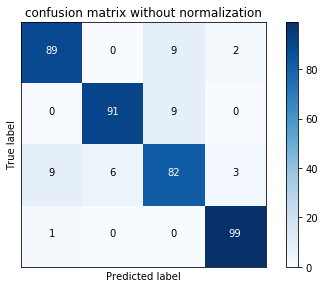

In [123]:
test_pred=clf_svm_pca.fit(X_train, Y_train).predict(x_test)
#print(confusion_matrix(test_label, pred))
plt.rcParams['figure.figsize'] = [6,4]


classes=range(1-4)


cmap=plt.cm.Blues
cm=confusion_matrix(np.array(test_label),np.array(test_pred))

plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
title= 'confusion matrix without normalization'

plt.title(title)

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation = 45)
plt.yticks(tick_marks, classes)

print ('confusion matrix without normalization')
print (cm)

thresh = cm.max() / 2
fmt = 'd'
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()




confusion matrix with normalization
[[0.89 0.   0.09 0.02]
 [0.   0.91 0.09 0.  ]
 [0.09 0.06 0.82 0.03]
 [0.01 0.   0.   0.99]]


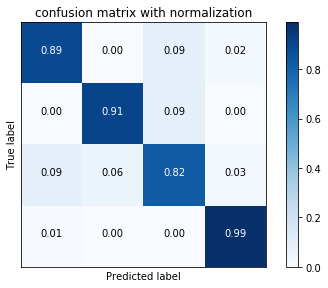

In [124]:
#normalized
plt.rcParams['figure.figsize'] = [6,4]

#plt.figure(figsize=(10, 6))
test_pred=clf_svm_pca.fit(X_train, Y_train).predict(x_test)
cmap=plt.cm.Blues

classes = range(1-4)
cm=confusion_matrix(np.array(test_label),np.array(test_pred))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]



plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.colorbar()
title= 'confusion matrix with normalization'
plt.title(title)

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation = 90)
plt.yticks(tick_marks, classes)


print ('confusion matrix with normalization')
print (cm)

np.set_printoptions(precision=2)



thresh = cm.max() / 1.5
fmt = '.2f' 
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()





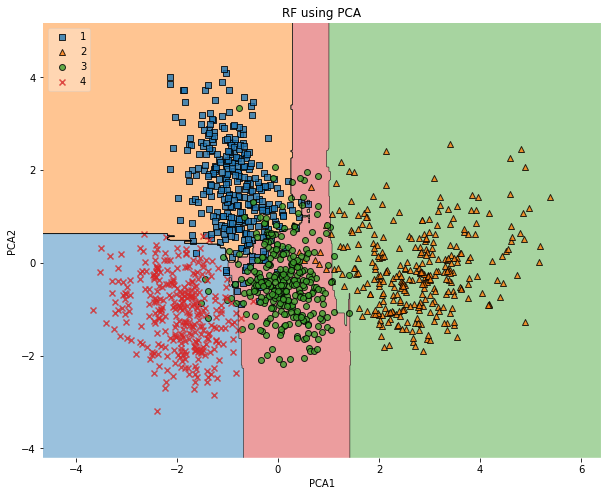

In [127]:
from mlxtend.plotting import plot_decision_regions   #http://rasbt.github.io/mlxtend/installation/ 

fig = plt.figure(figsize=(10,8))
# Plotting decision regions
plot_decision_regions(X_train, Y_train.to_numpy(), clf=clf_RF_pca, legend=2)

# Adding axes annotations
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('RF using PCA')
plt.show()

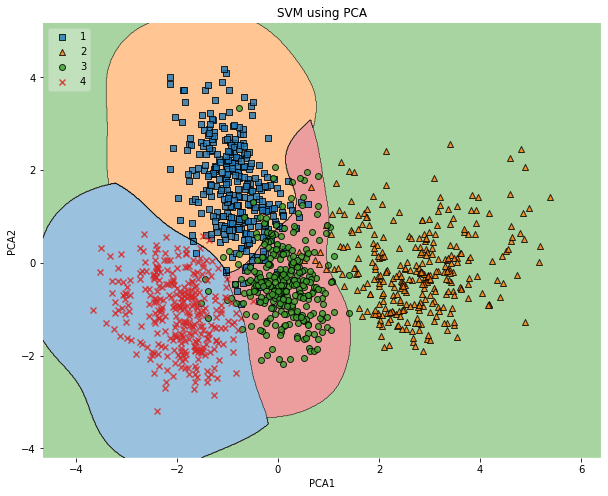

In [128]:
from mlxtend.plotting import plot_decision_regions   #http://rasbt.github.io/mlxtend/installation/ 

fig = plt.figure(figsize=(10,8))
# Plotting decision regions
plot_decision_regions(X_train, Y_train.to_numpy(), clf=clf_svm_pca, legend=2)

# Adding axes annotations
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('SVM using PCA')
plt.show()